In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,KFold

import numpy as np
from numpy import std
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from skopt import BayesSearchCV
from sklearn.compose import make_column_transformer

from numpy import mean
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.linear_model import Perceptron
from skopt import BayesSearchCV
from numpy import arange
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import skew, kurtosis

df = pd.read_csv('heart_2.csv')
y = df['HeartDiseaseorAttack']
X=df.drop(columns='HeartDiseaseorAttack')

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,stratify=y, random_state=42)

In [21]:
X[cols].describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


In [17]:
cols=['BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income']

In [18]:
for col in df[cols]:
    print("Skew: %s %.3f" % (col,skew(df[col])))

Skew: BMI 2.122
Skew: GenHlth 0.423
Skew: MentHlth 2.721
Skew: PhysHlth 2.207
Skew: Age -0.360
Skew: Education -0.777
Skew: Income -0.891


In [20]:
for col in  df[cols]:
    print("kurtosis: %s %.3f" % (col,kurtosis(df[col])))

kurtosis: BMI 10.997
kurtosis: GenHlth -0.383
kurtosis: MentHlth 6.442
kurtosis: PhysHlth 3.496
kurtosis: Age -0.581
kurtosis: Education 0.039
kurtosis: Income -0.280


<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

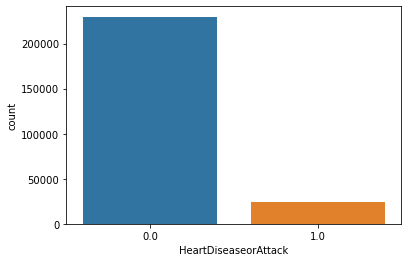

In [23]:
sns.countplot(x='HeartDiseaseorAttack',data=df)

In [ ]:
a=sns.countplot(x='thal',hue='heart attack',data=df)

In [41]:
cols2=['HighBP','HighChol','CholCheck','Smoker','Stroke','Diabetes','PhysActivity','Fruits','Veggies']

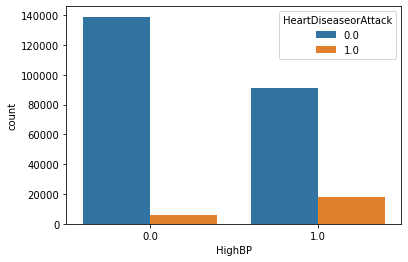

In [31]:
a=sns.countplot(x='HighBP',hue='HeartDiseaseorAttack',data=df)

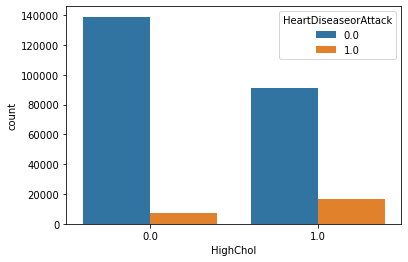

In [32]:
a=sns.countplot(x='HighChol',hue='HeartDiseaseorAttack',data=df)

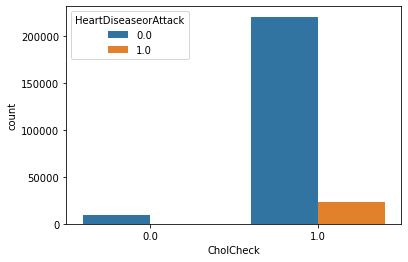

In [33]:
a=sns.countplot(x='CholCheck',hue='HeartDiseaseorAttack',data=df)

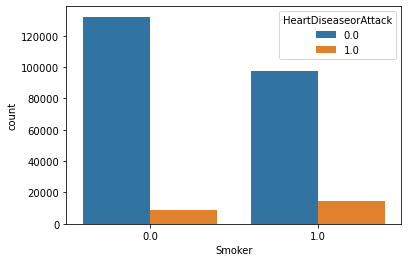

In [34]:
a=sns.countplot(x='Smoker',hue='HeartDiseaseorAttack',data=df)

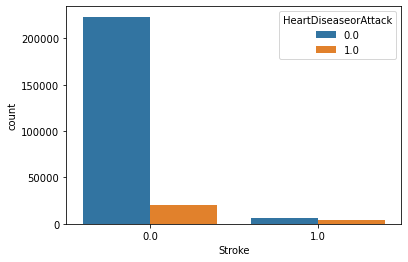

In [35]:
a=sns.countplot(x='Stroke',hue='HeartDiseaseorAttack',data=df)

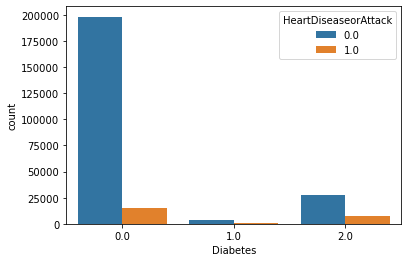

In [36]:
a=sns.countplot(x='Diabetes',hue='HeartDiseaseorAttack',data=df)

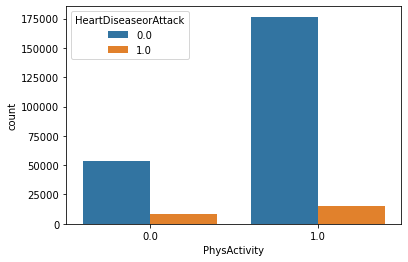

In [37]:
a=sns.countplot(x='PhysActivity',hue='HeartDiseaseorAttack',data=df)

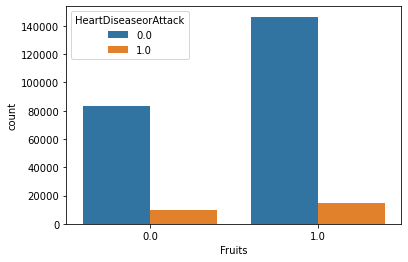

In [38]:
a=sns.countplot(x='Fruits',hue='HeartDiseaseorAttack',data=df)

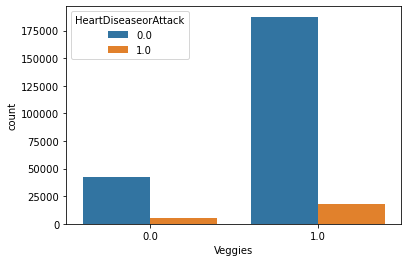

In [39]:
a=sns.countplot(x='Veggies',hue='HeartDiseaseorAttack',data=df)

In [3]:
cols=['BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income']

myheart = df['HeartDiseaseorAttack']
myBMI = df['BMI']

In [4]:
heart_0 = myheart == 0
heart_1 = myheart == 1

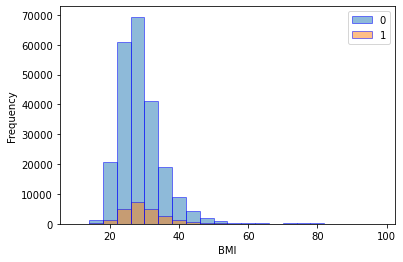

In [5]:
plt.hist(myBMI[heart_0], edgecolor='blue', alpha=0.5, bins =range(10,100,4) , label='0')
plt.hist(myBMI[heart_1], edgecolor='blue', alpha=0.5, bins = range(10,100,4), label='1')
plt.legend(loc='upper right')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

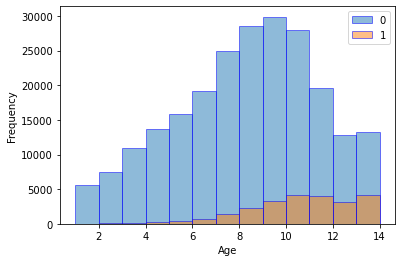

In [18]:
myheart = df['HeartDiseaseorAttack']
myAge = df['Age']

plt.hist(myAge[heart_0], edgecolor='blue', alpha=0.5, bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14], label='0')
plt.hist(myAge[heart_1], edgecolor='blue', alpha=0.5, bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14], label='1')
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

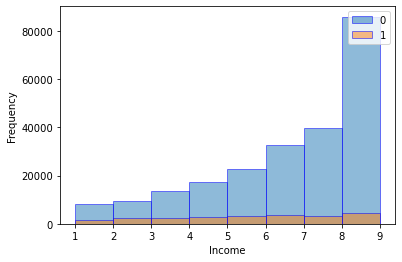

In [15]:
myheart = df['HeartDiseaseorAttack']
myIncome = df['Income']

plt.hist(myIncome[heart_0], edgecolor='blue', alpha=0.5, bins = [1,2,3,4,5,6,7,8,9], label='0')
plt.hist(myIncome[heart_1], edgecolor='blue', alpha=0.5, bins =[1,2,3,4,5,6,7,8,9], label='1')
plt.legend(loc='upper right')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

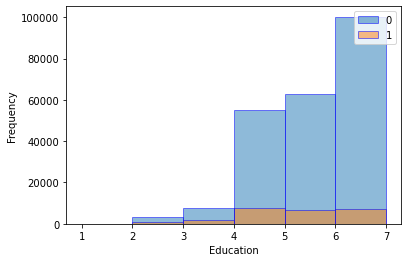

In [19]:
myheart = df['HeartDiseaseorAttack']
myIncome = df['Education']

plt.hist(myIncome[heart_0], edgecolor='blue', alpha=0.5, bins = [1,2,3,4,5,6,7], label='0')
plt.hist(myIncome[heart_1], edgecolor='blue', alpha=0.5, bins =[1,2,3,4,5,6,7], label='1')
plt.legend(loc='upper right')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

In [82]:
cols=['HighBP','HighChol','Smoker','Stroke','CholCheck','Fruits','Veggies','Diabetes']
dataset=df.groupby('HeartDiseaseorAttack')[cols].mean()
#dataset

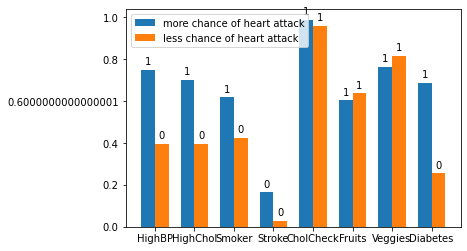

In [83]:
indx=np.arange(len(cols))
score_label=np.arange(0,1.2,0.2)

col1=list(dataset.T[1])
col2=list(dataset.T[0])
bar_width=0.35

fig,ax=plt.subplots()
bar_1=ax.bar(indx-bar_width/2, col1, bar_width, label='more chance of heart attack')
bar_2=ax.bar(indx+bar_width/2, col2, bar_width, label='less chance of heart attack ')

#inserting x axis label
ax.set_xticks(indx)
ax.set_xticklabels(cols)

ax.legend()

#inserting y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

def insert_data_labels(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}'.format(bar.get_height()),
            xy=(bar.get_x() + bar.get_width() / 2, bar_height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center',
            va='bottom'
        )

insert_data_labels(bar_1)
insert_data_labels(bar_2)

plt.show()

In [3]:
preprocessor_ = ColumnTransformer(transformers =[ ('scale',StandardScaler(), X_train.columns)], remainder ='passthrough')
under = RandomUnderSampler(sampling_strategy=0.5,random_state=40)
def get_models():
    models = dict()
    model= BalancedBaggingClassifier()
    models['balanced']= Pipeline(steps=[('under', under),('m',model)])
    
    model= DecisionTreeClassifier()
    models['balanced']= Pipeline(steps=[('under', under),('m',model)])
    
    models['xgboost'] = Pipeline(steps=[('under', under),('m',xgb.XGBClassifier())])
    
    models['Random forest'] = Pipeline(steps=[('under', under),('m',RandomForestClassifier(random_state=42))])

    model=AdaBoostClassifier(base_estimator=LinearSVC(),algorithm='SAMME')
    models['Ada_SVC'] = Pipeline(steps=[('preprocessor_',preprocessor_),('under', under),('m',model)])
    
    models['log_reg'] = Pipeline(steps=[('preprocessor_',preprocessor_),('under', under),('m',LogisticRegression())])

    model = AdaBoostClassifier()
    models['Adaboost'] = Pipeline(steps=[('under', under),('m',model)])

    model = AdaBoostClassifier(base_estimator = LogisticRegression(max_iter=400))
    models['Adaboost_LR'] = Pipeline(steps=[('preprocessor_',preprocessor_),('under', under),('m',model)])
    return models
 
def evaluate_model(model, X, y):
    cv = StratifiedKFold(n_splits=5,shuffle=True )
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
    return scores
 
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>balanced 0.290 (0.002)
>xgboost 0.401 (0.003)
>Random forest 0.391 (0.004)
>Ada_SVC 0.399 (0.005)
>log_reg 0.415 (0.003)
>Adaboost 0.413 (0.004)
>Adaboost_LR 0.414 (0.004)


In [ ]:
under = RandomUnderSampler(sampling_strategy=1,random_state=40)
preprocessor_ = ColumnTransformer(transformers =[ ('scale',StandardScaler(), X_train.columns)], remainder ='passthrough')

def get_models():
    models = dict()
    for i in range(5,21):
        rfe = RFE(estimator=LogisticRegression(max_iter=400), n_features_to_select=i)
#        model = AdaBoostClassifier(base_estimator = LogisticRegression(max_iter=400),algorithm='SAMME')
        model= xgb.XGBClassifier(use_label_encoder=False)
        models[str(i)] = Pipeline(steps=[("preprocessor_", preprocessor_),('s',rfe),('under', under),('m',model)])
    return models

def evaluate_model(model, X, y):
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>5 0.351 (0.003)


In [ ]:
preprocessor_ = ColumnTransformer(transformers =[ ('scale',StandardScaler(), X_train.columns)], remainder ='passthrough')
under = RandomUnderSampler(sampling_strategy=0.5,random_state=40)
model=AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=400),algorithm='SAMME')
model= xgb.XGBClassifier(use_label_encoder=False)

def get_models():
    models = dict()
    rfe = RFE(estimator=LogisticRegression(max_iter=400), n_features_to_select=9)
    models['lr'] = Pipeline(steps=[('preprocessor_',preprocessor_),('rfe',rfe),('under', under),('m',model)])
  
    rfe = RFE(estimator=Perceptron(), n_features_to_select=9)  
    models['per'] = Pipeline(steps=[('preprocessor_',preprocessor_),('rfe',rfe),('under', under),('m',model)])
    
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=9)
    models['dtc'] = Pipeline(steps=[('preprocessor_',preprocessor_),('rfe',rfe),('under', under),('m',model)])
    return models
 
def evaluate_model(model, X, y):
    cv = StratifiedKFold(n_splits=5,shuffle=True)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
    return scores
 
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

In [11]:
solver=['newton-cg', 'lbfgs', 'liblinear']
random_grid = {'under__sampling_strategy':[0.5,0.8,1],'rfe__estimator__C':[0.001,0.01,0.1,1,10,100,1000],
'rfe__estimator__solver':solver,'rfe__n_features_to_select':[6,7,8,9,10,11],"model__learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
"model__max_depth":[3,4,5,6,8,10,12,15], "model__min_child_weight":[1,3,5,7],"model__gamma":[0.0,0.1,0.2,0.3,0.4],
"model__colsample_bytree":[0.3,0.4,0.5,0.7],'model__subsample': (0.01, 1.0, 'uniform'), 
'model__colsample_bytree': [0.3,0.4,0.5,0.7],'model__colsample_bylevel': (0.01, 1.0, 'uniform'), 'model__n_estimators': (50, 100,200,300)}

rfe = RFE(estimator=LogisticRegression(max_iter=600))
under = RandomUnderSampler(random_state=40)
preprocessor_ = ColumnTransformer(transformers =[ ('scale',StandardScaler(), X_train.columns)], remainder ='passthrough')

model= xgb.XGBClassifier(use_label_encoder=False,n_jobs = 1,objective = 'binary:logistic',
eval_metric = 'error', tree_method='approx')

model_pipeline=Pipeline(steps=[("preprocessor_", preprocessor_),('rfe',rfe),('under', under),('model', model)])

cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

opt = BayesSearchCV( model_pipeline,[(random_grid, 80)],cv=cv,scoring='f1')
opt.fit(X_train, y_train)

print(opt.best_params_)
print(opt.best_score_)

OrderedDict([('model__colsample_bylevel', 0.01), ('model__colsample_bytree', 0.7), ('model__gamma', 0.2), ('model__learning_rate', 0.05), ('model__max_depth', 3), ('model__min_child_weight', 1), ('model__n_estimators', 300), ('model__subsample', 1.0), ('under__sampling_strategy', 0.5)])
0.41691052646347637


In [10]:
random_grid = {'rfe__n_features_to_select':[6,7,8,9,10],'under__sampling_strategy':[0.5,0.8,1],
'model__base_estimator__C':[0.0001,0.001,0.01,0.1,1,10,100,1000],'model__base_estimator__max_iter':[500,1000,5000,10000],
               'model__learning_rate': arange(0.1, 1, 0.1),"model__n_estimators": [ 50, 100,200,250,400]  }

rfe = RFE(estimator=LogisticRegression(max_iter=400))
under = RandomUnderSampler(random_state=40)
preprocessor_ = ColumnTransformer(transformers =[ ('scale',StandardScaler(), X_train.columns)], remainder ='passthrough')

model = AdaBoostClassifier(base_estimator = LogisticRegression(),algorithm='SAMME')

model_pipeline = Pipeline(steps =[("preprocessor_", preprocessor_),('rfe',rfe),('under', under),('model', model)])

cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

opt = BayesSearchCV( model_pipeline,[(random_grid, 70)],cv=cv,scoring='f1')
opt.fit(X_train, y_train)

print(opt.best_params_)
print(opt.best_score_)

OrderedDict([('model__base_estimator__C', 100.0), ('model__base_estimator__max_iter', 5000), ('model__learning_rate', 0.6), ('model__n_estimators', 400), ('under__sampling_strategy', 0.5)])
0.4151229025085251


In [22]:
under = RandomUnderSampler(sampling_strategy=0.5,random_state=10)
#rfe = RFE(estimator=LogisticRegression(C=0.001,solver='lbfgs',max_iter=400), n_features_to_select=11)#xgb
rfe = RFE(estimator=LogisticRegression(max_iter=400), n_features_to_select=9)#Adaboost with rfe

model=AdaBoostClassifier(base_estimator=LogisticRegression(C=1000,max_iter=400),learning_rate=0.6,
n_estimators=200,algorithm='SAMME')#with rfe    
#model=AdaBoostClassifier(base_estimator=LogisticRegression(),algorithm='SAMME') #Adaboost default   
#model=AdaBoostClassifier(base_estimator=LogisticRegression(C=100),learning_rate=0.6,n_estimators=400,
#algorithm='SAMME')#without rfe   

#model= xgb.XGBClassifier(colsample_bylevel=1,colsample_bytree=0.7,gamma=0.4,learning_rate=0.05,
#max_depth=3,min_child_weight=7,n_estimators=200,subsample=1,use_label_encoder=False,
#n_jobs = 1,objective = 'binary:logistic',eval_metric = 'error', tree_method='approx')#with rfe

#model= xgb.XGBClassifier(colsample_bylevel=0.01,colsample_bytree=0.7,gamma=0.2,learning_rate=0.05,
#max_depth=3,min_child_weight=1,n_estimators=300,subsample=1,use_label_encoder=False,
#n_jobs = 1,objective = 'binary:logistic',eval_metric = 'error', tree_method='approx')#without rfe

#model= xgb.XGBClassifier(use_label_encoder=False,n_jobs=1,objective='binary:logistic',eval_metric='error',tree_method='approx') #default

pipeline_model = Pipeline(steps=[ ("preprocessor_", preprocessor_),('rfe',rfe),('under',under),('model',model)])
#pipeline_model = Pipeline(steps=[ ("preprocessor_", preprocessor_),('under',under),('model',model)]) #without rfe

pipeline_model.fit(X_train, y_train)

y_pred_train=pipeline_model.predict(X_train)

conf_pred_train=confusion_matrix(y_train,y_pred_train)
print(conf_pred_train)

score_train=f1_score(y_train,y_pred_train)
print("F1 on training set are {}".format(score_train))
y_pred_test = pipeline_model.predict(X_test)

conf_pred_test = confusion_matrix(y_test, y_pred_test) 
print(conf_pred_test)
score=f1_score(y_test,y_pred_test)
print(" F1 on test set are {}".format(score))
print(classification_report(y_test, y_pred_test))

[[159503  24327]
 [  7722  11392]]
F1 on training set are 0.41551620374591947
[[39905  6052]
 [ 1920  2859]]
 F1 on test set are 0.41767713659605554
              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91     45957
         1.0       0.32      0.60      0.42      4779

    accuracy                           0.84     50736
   macro avg       0.64      0.73      0.66     50736
weighted avg       0.89      0.84      0.86     50736



In [23]:
recall_sensitivity = recall_score(y_test, y_pred_test, pos_label=1)

recall_specificity = recall_score(y_test, y_pred_test, pos_label=0)

recall_sensitivity, recall_specificity 

(0.5982423101067169, 0.8683116826598777)

In [3]:
preprocessor_ = ColumnTransformer(transformers =[ ('scale',StandardScaler(), X_train.columns)], remainder ='passthrough')
under = RandomUnderSampler(sampling_strategy=0.5,random_state=10)

rfe_xgb =  RFE(estimator=LogisticRegression(C=0.001,solver='lbfgs',max_iter=400), n_features_to_select=11)#xgb
rfe_ada = RFE(estimator=LogisticRegression(max_iter=400), n_features_to_select=9)#Adaboost with rfe

model_xgb= xgb.XGBClassifier(colsample_bylevel=1,colsample_bytree=0.7,gamma=0.4,learning_rate=0.05,
max_depth=3,min_child_weight=7,n_estimators=200,subsample=1,use_label_encoder=False,
n_jobs = 1,objective = 'binary:logistic',eval_metric = 'error', tree_method='approx')#with rfe

model_ada=AdaBoostClassifier(base_estimator=LogisticRegression(C=1000,max_iter=400),learning_rate=0.6,
n_estimators=200,algorithm='SAMME')

pipeline_model_xgb = Pipeline(steps=[ ("preprocessor_", preprocessor_),('rfe_xgb',rfe_xgb),('under',under),('model_xgb',model_xgb)])
pipeline_model_ada = Pipeline(steps=[ ("preprocessor_", preprocessor_),('rfe_ada',rfe_ada),('under',under),('model_ada',model_ada)])

Pipeline(steps=[('preprocessor_',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object'))])),
                ('rfe_ada',
                 RFE(estimator=LogisticRegression(max_iter=400),
                     n_features_to_select=9)),
                ('under',
                 RandomUnderSampler(random_state=10, sampling_strategy=0.5)),
                ('model_ada',
                 AdaBoostClassifier(algorithm='SAMME',
                                    base_estimator=LogisticRegression(C=1000,
                                                                    

In [7]:

model_ada=pipeline_model_ada.fit(X_train, y_train)

probs_ada = model_ada.predict_proba(X_test)[:, 1]

model_xgb =  pipeline_model_xgb.fit(X_train, y_train)

probs_xgb = model_xg.predict_proba(X_test)[:, 1]

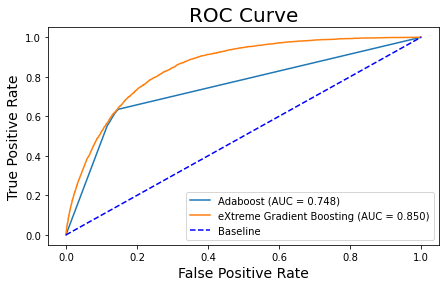

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve


auc_ada = roc_auc_score(y_test, probs_ada)
fpr_ada, tpr_ada, thresholds_rf = roc_curve(y_test, probs_ada)

auc_xgb = roc_auc_score(y_test, probs_xgb)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, probs_xgb)

plt.figure(figsize=(7, 4))

plt.plot(fpr_ada, tpr_ada, label=f'Adaboost (AUC = {auc_ada:.3f})')
plt.plot(fpr_xg, tpr_xg, label=f'eXtreme Gradient Boosting (AUC = {auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

In [5]:
rfe = RFE(estimator=LogisticRegression(C=0.001,solver='lbfgs',max_iter=400), n_features_to_select=11)#xgb
#rfe = RFE(estimator=LogisticRegression(max_iter=400), n_features_to_select=9)#Adaboost

fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

print(X_train.columns[rfe.support_])

Num Features: 11
Selected Features: [ True  True False False  True  True  True False False False  True False
  True  True False False  True  True  True False False]
Feature Ranking: [ 1  1  2 10  1  1  1  5  7  4  1  9  1  1 11  8  1  1  1  6  3]
Index(['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes',
       'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex',
       'Age'],
      dtype='object')
